In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
actress = pd.read_json("jav-py/acctress.json")
actress.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


In [3]:
df = actress [["bust", "waist","hip","height", "blood_type"]]
df.head()

,bust,waist,hip,height,blood_type
0,95.0,60.0,88.0,NaN,AB
1,90.0,58.0,86.0,157.0,A
2,96.0,55.0,85.0,168.0,B
3,80.0,59.0,82.0,162.0,O
4,82.0,55.0,89.0,162.0,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        6456 non-null   float64
 1   waist       6436 non-null   float64
 2   hip         6428 non-null   float64
 3   height      5012 non-null   float64
 4   blood_type  3171 non-null   object 
dtypes: float64(4), object(1)
memory usage: 437.1+ KB


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        2678 non-null   float64
 1   waist       2678 non-null   float64
 2   hip         2678 non-null   float64
 3   height      2678 non-null   float64
 4   blood_type  2678 non-null   object 
dtypes: float64(4), object(1)
memory usage: 125.5+ KB


In [6]:
df .blood_type.value_counts()

A     1100
O      939
B      422
AB     217
Name: blood_type, dtype: int64

In [7]:
mapper = {"O": 0, "A": 1, "B": 2, "AB": 3}
df["blood_type"] = df["blood_type"].map(mapper)

In [8]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


In [9]:
actress_np = df.to_numpy()
actress_np

array([[ 90.,  58.,  86., 157.,   1.],
       [ 96.,  55.,  85., 168.,   2.],
       [ 80.,  59.,  82., 162.,   0.],
       ...,
       [ 83.,  58.,  85., 165.,   0.],
       [ 88.,  58.,  87., 153.,   0.],
       [ 88.,  59.,  86., 161.,   2.]])

In [10]:
#number of cluster = 5
k_mean_5 = KMeans(n_clusters = 5)
k_mean_5.fit(actress_np)
label_5 = k_mean_5.labels_

In [11]:
label_5

array([4, 1, 2, ..., 1, 4, 1])

In [15]:
metrics.silhouette_score(actress_np, label_10, metric="euclidean")

0.19485292233395346

In [16]:
metrics.calinski_harabasz_score(actress_np, label_10)

768.3557910141576

In [14]:
#number of cluster = 10
k_mean_10 = KMeans(n_clusters = 10)
k_mean_10.fit(actress_np)
label_10 = k_mean_10.labels_

In [18]:
sum_distance = []
K = range(1,15)
for k in K:
    k_mean = KMeans(n_clusters = k)
    k_mean.fit(actress_np)
    label = k_mean.labels_
    sum_distance.append(k_mean.inertia_)

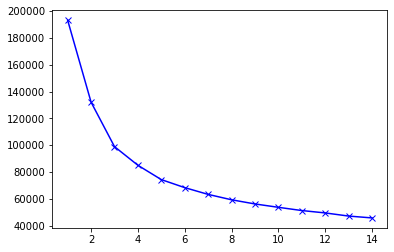

In [19]:
plt.plot(K, sum_distance, "bx-")
plt.show()

In [25]:
#choose n = 3
#number of cluster = 3
k_mean_3 = KMeans(n_clusters = 3)
model = k_mean_3.fit(actress_np)
result = k_mean_3.labels_

In [26]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


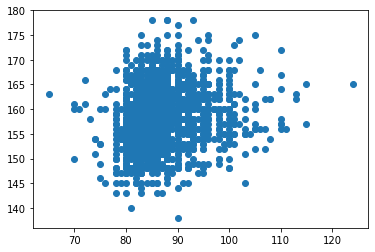

In [27]:
plt.scatter(actress_np[:,0], actress_np[:,3])
plt.show()

In [34]:
print(model.cluster_centers_[:,0])
print(model.cluster_centers_[:,3])

[85.59638009 96.38218391 84.39591837]
[162.90045249 159.57471264 153.96106122]


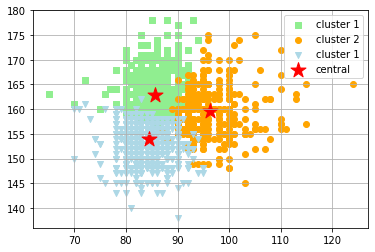

In [35]:
plt.scatter(
    actress_np[result == 0, 0], actress_np[result == 0, 3],
    c= "lightgreen",
    marker = "s",
    label = "cluster 1",
)
plt.scatter(
    actress_np[result == 1, 0], actress_np[result == 1, 3],
    c= "orange",
    marker = "o",
    label = "cluster 2",
)
plt.scatter(
    actress_np[result == 2, 0], actress_np[result == 2, 3],
    c= "lightblue",
    marker = "v",
    label = "cluster 1",
)
plt.scatter(
    [85.59638009, 96.38218391, 84.39591837], [162.90045249, 159.57471264, 153.96106122],
     s = 250,
    marker = "*",c = "red",
    label =  "central"
)
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()
        

In [ ]:
#input: vong 1, vong2, vong3, chieu, cao, nhom mau
#--> belong to which cluster
#random 10 in the cluster

In [39]:
df_1 = actress [["id","bust", "waist","hip","height", "blood_type"]]
df_1.head()
df_1 = df_1.dropna()
df.info()
df_2 = actress[["id", "name", "japanName"]]
df_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        2678 non-null   float64
 1   waist       2678 non-null   float64
 2   hip         2678 non-null   float64
 3   height      2678 non-null   float64
 4   blood_type  2678 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.5 KB


,id,name,japanName
0,3,Kitagawa Yui,北川ゆい
1,4,Akira,Akira
2,6,Cocolo,COCOLO
3,8,Saiko,Saiko
4,11,Aida Momo,あいだもも


In [40]:
lookup = df_1.merge(df_2, on = "id", how = "left")
lookup. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
 6   name        2678 non-null   object 
 7   japanName   2678 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.3+ KB


In [41]:
lookup["cluster"] = result
lookup.head()

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
0,4,90.0,58.0,86.0,157.0,A,Akira,Akira,2
1,6,96.0,55.0,85.0,168.0,B,Cocolo,COCOLO,1
2,8,80.0,59.0,82.0,162.0,O,Saiko,Saiko,0
3,11,82.0,55.0,89.0,162.0,A,Aida Momo,あいだもも,0
4,17,85.0,60.0,88.0,165.0,A,Aduki Miyu,あづき美由,0


In [44]:
def recommend(model, vong1, vong2, vong3, chieu_cao, nhom_mau):
    arr = np.array([[vong1, vong2, vong3, chieu_cao, nhom_mau]])
    pred = model.predict(arr)
    return lookup[lookup["cluster"] == pred[0]].sample(10)


In [46]:
vong1 = 86
vong2= 55
vong3 = 90
chieu_cao = 160
nhom_mau = 0 #nhom mu o
recommend(model, vong1, vong2, vong3, chieu_cao, nhom_mau)

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
1250,1000567,84.0,57.0,82.0,162.0,A,Erina,英里奈,0
862,23158,90.0,60.0,88.0,163.0,A,Ibuki Riko,伊吹りこ,0
534,18110,82.0,57.0,84.0,165.0,AB,Usikawa Koto,牛川とこ,0
116,11492,85.0,58.0,87.0,168.0,O,Nene,寧々,0
2028,1031804,90.0,57.0,86.0,169.0,A,Sasamoto Azusa,笹本梓,0
1954,4325,82.0,56.0,84.0,162.0,A,Itou Rei,伊東怜,0
2372,666,86.0,56.0,87.0,161.0,A,Oikawa Nao,及川奈央,0
353,15059,90.0,60.0,88.0,160.0,A,Yuzuki Aya,柚木あや,0
34,1098,84.0,60.0,87.0,164.0,B,Sakuragi Rui,桜樹ルイ,0
914,23797,83.0,58.0,83.0,167.0,O,Ayanami Yuu,綾波優,0
